# Poisson process (20pts)

The file `particles.txt` contains the numbers of charged particles measured by a physical  instrument (detector). The measurements were taken with the sensing period 1s. These phenomena are often described by the Poisson distribution. The goal is to estimate the process rate - Poisson parameter $\lambda$.

To summarize and shed some light on solution:

Let us denote the observed random variable - the number of particles at each time instant $t = 1, 2, \ldots$ as

$$
X_t \sim \mathrm{Poisson}(\lambda)\qquad \text{ with the pdf }\quad f(x_t|\lambda).
$$

A convenient prior distribution for $\lambda$ is the gamma distribution,

$$
\lambda \sim \mathrm{Gamma}(a, b)\qquad\text{ with the pdf }\qquad \pi(\lambda|a, b).
$$

You tasks:
- derive the Bayesian update of the gamma distribution,
- write a code that performs this update sequentially ("online"),
- plot the evolution of the estimate $\hat{\lambda}$ with increasing $t$, include any uncertainty measure,
- interpret your results.

The exponential family form of updates = 4pts. Without it, e.g., using the wikipedia formulas, the maximum reduces to 16pts.

Hints:
- the Poisson pdf can be found on wikipedia
- the gamma pdf can be found on wikipedia too, I suggest sticking with the shape/rate ($\alpha/\beta$) parameterization.
- for plotting, it may be useful to exploit scipy.stats ;-)

Extras:
- the posterior predictive distribution is the negative binomial distribution. Those who include the Bayesian prediction in terms of the predicted value and some uncertainty measure, e.g., 95% interval or $\pm$3 st. deviations: +10pts ;-)

In [1]:
import numpy as np
import plotly.express as px
import sympy as sp
from sympy.stats import Gamma, Poisson, density

# EDA

In [2]:
data = np.loadtxt("particles.txt")

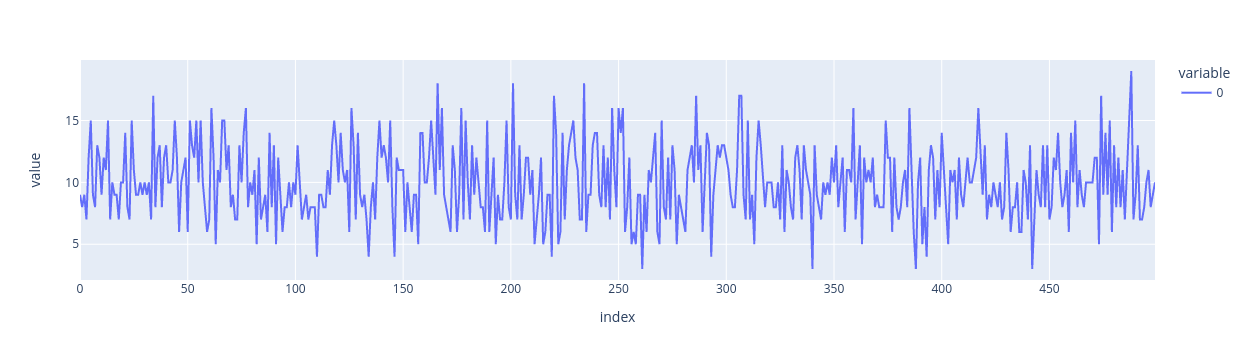

In [3]:
px.line(data)

# Math

In [4]:
lam, a, b, x = sp.symbols("lambda alpha beta x")

In [5]:
X = Poisson("lambda", lam)
density(X)(x)

lambda**x*exp(-lambda)/factorial(x)

In [6]:
lam = Gamma("lambda", a, 1 / b)
density(lam)(x).simplify()

x**(alpha - 1)*exp(-beta*x)/((1/beta)**alpha*gamma(alpha))

In [7]:
density(X)(x)

lambda**x*exp(-lambda)/factorial(x)